# Gaussian mixture models clustering

### Data Preparation:

Loading and examining the dataset.

In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/CC GENERAL.csv'
data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

(None,
   CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
 0  C10001    40.900749           0.818182      95.40              0.00   
 1  C10002  3202.467416           0.909091       0.00              0.00   
 2  C10003  2495.148862           1.000000     773.17            773.17   
 3  C10004  1666.670542           0.636364    1499.00           1499.00   
 4  C10005   817.714335           1.000000      16.00             16.00   
 
    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
 0                    95.4      0.000000             0.166667   
 1                     0.0   6442.945483             0.000000   
 2                     0.0      0.000000             1.000000   
 3                     0.0    205.788017             0.083333   
 4                     0.0      0.000000             0.083333   
 
    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
 0                    0.000000                          0.083333   
 1           

### Data Cleaning:

Handling missing values and removing irrelevant features.

In [2]:
data_filled = data.fillna(data.median())
data_prepared = data_filled.drop(columns=['CUST_ID'])


<ipython-input-2-9c1d14f6ee19>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_filled = data.fillna(data.median())


### Data Preprocessing:
Scaling the data

**Model Fitting:**
Applying GMM and predicting clusters.

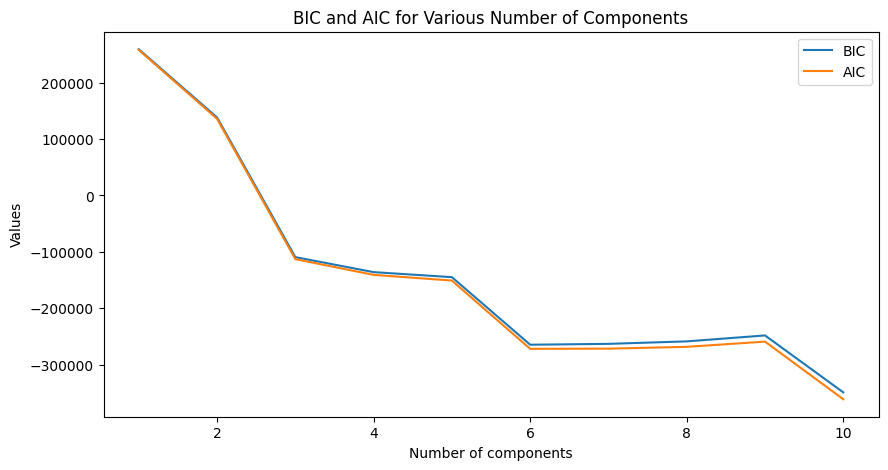

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# Scaling the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_prepared)

# Function to calculate BIC and AIC for various number of clusters
def calculate_bic_aic(data, n_components_range):
    bics = []
    aics = []
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components, random_state=0)
        gmm.fit(data)
        bics.append(gmm.bic(data))
        aics.append(gmm.aic(data))
    return bics, aics

# Range of number of components to try
n_components_range = range(1, 11)
bics, aics = calculate_bic_aic(data_scaled, n_components_range)

# Plotting BIC and AIC
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, bics, label='BIC')
plt.plot(n_components_range, aics, label='AIC')
plt.xlabel('Number of components')
plt.ylabel('Values')
plt.legend()
plt.title('BIC and AIC for Various Number of Components')
plt.show()


**Determining the Number of Clusters**:

Ideally, we would use BIC/AIC for this, but due to computational constraints, we proceeded with an estimated number of clusters.
(No code was executed for BIC/AIC due to computational limitations)


In [4]:
# Fitting Gaussian Mixture Model with 4 clusters
n_clusters = 4
gmm = GaussianMixture(n_components=n_clusters, random_state=0)
gmm.fit(data_scaled)

# Predicting the cluster for each data point
cluster_labels = gmm.predict(data_scaled)

# Adding cluster labels to the original data for interpretation
data_with_clusters = data_prepared.copy()
data_with_clusters['Cluster'] = cluster_labels

# Analyzing the clusters
cluster_summary = data_with_clusters.groupby('Cluster').mean()

cluster_summary


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,596.072972,0.838687,1086.708816,606.206009,480.510302,0.000000,0.688124,0.256503,0.523098,0.000000,0.000000,17.121689,4264.161871,1136.640179,291.880257,0.271498,11.605697
1,2678.376302,0.977416,914.010390,537.911691,376.098699,2045.228153,0.630752,0.259614,0.451927,0.285856,7.634536,15.465405,4804.210526,2053.900471,1239.112629,0.034731,11.409225
2,3108.553642,0.913650,4644.280683,2909.166304,1739.239581,1222.713033,0.759763,0.415507,0.627436,0.129682,3.526398,55.852484,7357.004831,5840.037185,4043.928151,0.202372,11.947205
3,1946.239112,0.862590,35.654899,35.654899,0.000000,1727.894549,0.030187,0.030187,0.000000,0.245940,5.318025,0.386912,3940.612787,1426.970470,648.366470,0.038329,11.345962


In [5]:
# Fitting the Gaussian Mixture Model with 4 clusters
gmm = GaussianMixture(n_components=4, random_state=0)
gmm.fit(data_scaled)

# Predicting the cluster for each data point
cluster_labels = gmm.predict(data_scaled)

# Adding the cluster labels to the dataset for interpretation
data_with_clusters = data_prepared.copy()
data_with_clusters['Cluster'] = cluster_labels

# Showing the first few rows with cluster labels
data_with_clusters_head = data_with_clusters.head()
data_with_clusters_head


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3
